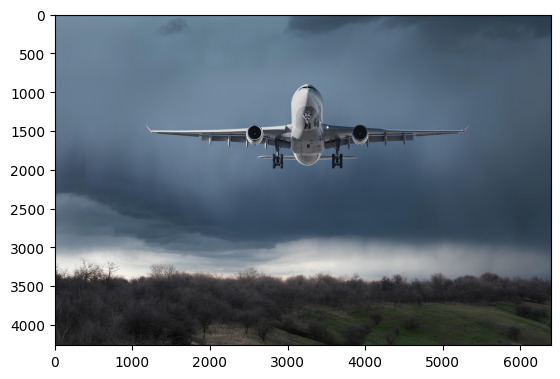

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('acidente_mendonca.jpeg'))

## Agrupa acidentes aeronáuticos em clusters definidos pelo modelo

Os dados utilizados nesse projeto foram analisados, limpos e tratados no projeto:
https://github.com/jairobernardesjunior/Cenipa_limpa_trata_armazena

São dados disponibilizados pelo Cenipa-Centro de Investigação e Prevenção de Acidentes Aeronáuticos da Força Aérea Brasileira.

## Faz o reconhecimento dos dados para selecionar as variáveis que vão ser incluidas na clusterização de acidentes aeronáuticos.

In [33]:
# importa bibliotecas

# essas são as bibliotecas utilizadas nessa primeira fase de reconhecimento e análise dos dados
# algumas estão inibidas porque foram utilizadas para ver se o resultado seria mais interessante para
# a padronização dos dados, foram deixas aqui por haver necessidade futura de serem utilizadas como 
# melhor resultado.

from sklearn.preprocessing import (
    OneHotEncoder, # transforma dados categóricos em colunas e valores binário 0-1
    StandardScaler, # faz a padronização dos dados para melhorar a normalidade
    MinMaxScaler, # transforma os valores dentro de uma escala entre 0 e 1 e melhora a normalidade
    PowerTransformer, # transforma os valores para melhorar a normalidade
)
from sklearn.compose import ColumnTransformer

from scipy.stats import skew 
from scipy.stats import kurtosis 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore')

In [34]:
# carrega arquivo de acidentes aeronáuticos fornecidos pela cenipa em dataframe
df_acidentes_aero = pd.read_csv('arquivos/df_acidentes_aeronauticos.csv')

In [35]:
# verifica o tamanho do arquivo conferindo a quantidade de linha(registros) e colunas(varáveis)
df_acidentes_aero.shape

(9819, 45)

In [36]:
# reconhecendo as variáveis disponíveis
# verifica-se a quantidade e os nomes das variáveis(colunas) existente no dataframe
# verifica-se se existe algum nulo em alguma linha do dataframe
# verifica-se o tipo de variáveis existentes no dataframe

df_acidentes_aero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9819 entries, 0 to 9818
Data columns (total 45 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ocorrencia_classificacao         9819 non-null   object 
 1   ocorrencia_cidade                9819 non-null   object 
 2   ocorrencia_uf                    9819 non-null   object 
 3   ocorrencia_pais                  9819 non-null   object 
 4   ocorrencia_aerodromo             9819 non-null   object 
 5   ocorrencia_dia                   9819 non-null   object 
 6   ocorrencia_hora                  9819 non-null   object 
 7   investigacao_status              8405 non-null   object 
 8   total_aeronaves_envolvidas       9819 non-null   int64  
 9   ocorrencia_saida_pista           9819 non-null   object 
 10  ocorrencia_latitude              9819 non-null   float64
 11  ocorrencia_longitude             9819 non-null   float64
 12  aeronave_matricula  

In [37]:
# confirma a inexistência de nulos
# no .info() anterior percebemos que a coluna investigação status apresenta 8405 linhas que não tem nulos
# de um total de 9819 linhas, existindo 1414 linhas com o campo(variável) investigacao_status nulo.
# temos também uma linha com o campo aeronave_tipo_icao nulo
df_acidentes_aero.isnull().sum()

ocorrencia_classificacao              0
ocorrencia_cidade                     0
ocorrencia_uf                         0
ocorrencia_pais                       0
ocorrencia_aerodromo                  0
ocorrencia_dia                        0
ocorrencia_hora                       0
investigacao_status                1414
total_aeronaves_envolvidas            0
ocorrencia_saida_pista                0
ocorrencia_latitude                   0
ocorrencia_longitude                  0
aeronave_matricula                    0
aeronave_tipo_veiculo                 0
aeronave_fabricante                   0
aeronave_modelo                       0
aeronave_tipo_icao                    1
aeronave_motor_tipo                   0
aeronave_motor_quantidade             0
aeronave_pmd                          0
aeronave_pmd_categoria                0
aeronave_assentos                     0
aeronave_ano_fabricacao               0
aeronave_pais_fabricante              0
aeronave_pais_registro                0


In [38]:
# apaga coluna com nulos
# aqui nós apagamos o campo(coluna) investigacao_status mas
# pois não usaremos esse campo em nosso trabalho.
# não foi utilizado também os dados de aeronave_tipo_icao
# essas duas colunas serão ignoradas mais a frente, não serão utilizadas

#df_acidentes_aero = df_acidentes_aero.drop('investigacao_status', axis=1)

In [39]:
# apaga registros com nulos
# aqui nós apagávamos as linha com nulos no campo investigacao_status mas inibimos esse procedimento
# pois não usaremos esse campo em nosso trabalho.
# não foi utilizado também os dados de aeronave_tipo_icao

#df_acidentes_aero = df_acidentes_aero.dropna()

In [40]:
# verificando se existe linhas duplicadas, linhas idênticas o que poderia atrapalhar na performance
# e também no algorítimo do modelo
# não foi encontrado nenhuma linha duplicada

df_acidentes_aero.duplicated().sum()

0

In [41]:
# checando mais uma vez a dimensão do dataframe
df_acidentes_aero.shape

(9819, 45)

In [42]:
# verifica o conteúdo das variáveis
# faz o primeiro reconhecimento do conteúdo das variáveis
# vemos que existem várias variáveis categóricas e numéricas, vamos verificar cada uma
# para ver se há possibilidade de usarmos em nosso estudo

df_acidentes_aero.head(2)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-16 00:00:00,NaN,1,NÃO,0.0,0.0,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00
1,INCIDENTE,LONDRINA,PR,BRASIL,***,2007-01-01,2024-05-16 21:10:00,NaN,1,NÃO,0.0,0.0,PTRON,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-711ST,P28T,PISTÃO,MONOMOTOR,1315,1315,4.0,1982.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,INDETERMINADA,PRIVADA,NENHUM,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,18:00 às 00:00


In [43]:
# seleciona somente colunas(variáveis) numéricas
# com essas variáveis plotaremos histogramas para verificas a normalidade da distribuição
# conferindo se podemos utilizar ou não em nosso trabalho de clusterização
df_number = df_acidentes_aero.select_dtypes(include="number").columns
print(len(df_number))
print(df_number)

8
Index(['total_aeronaves_envolvidas', 'ocorrencia_latitude',
       'ocorrencia_longitude', 'aeronave_pmd', 'aeronave_pmd_categoria',
       'aeronave_assentos', 'aeronave_ano_fabricacao',
       'aeronave_fatalidades_total'],
      dtype='object')


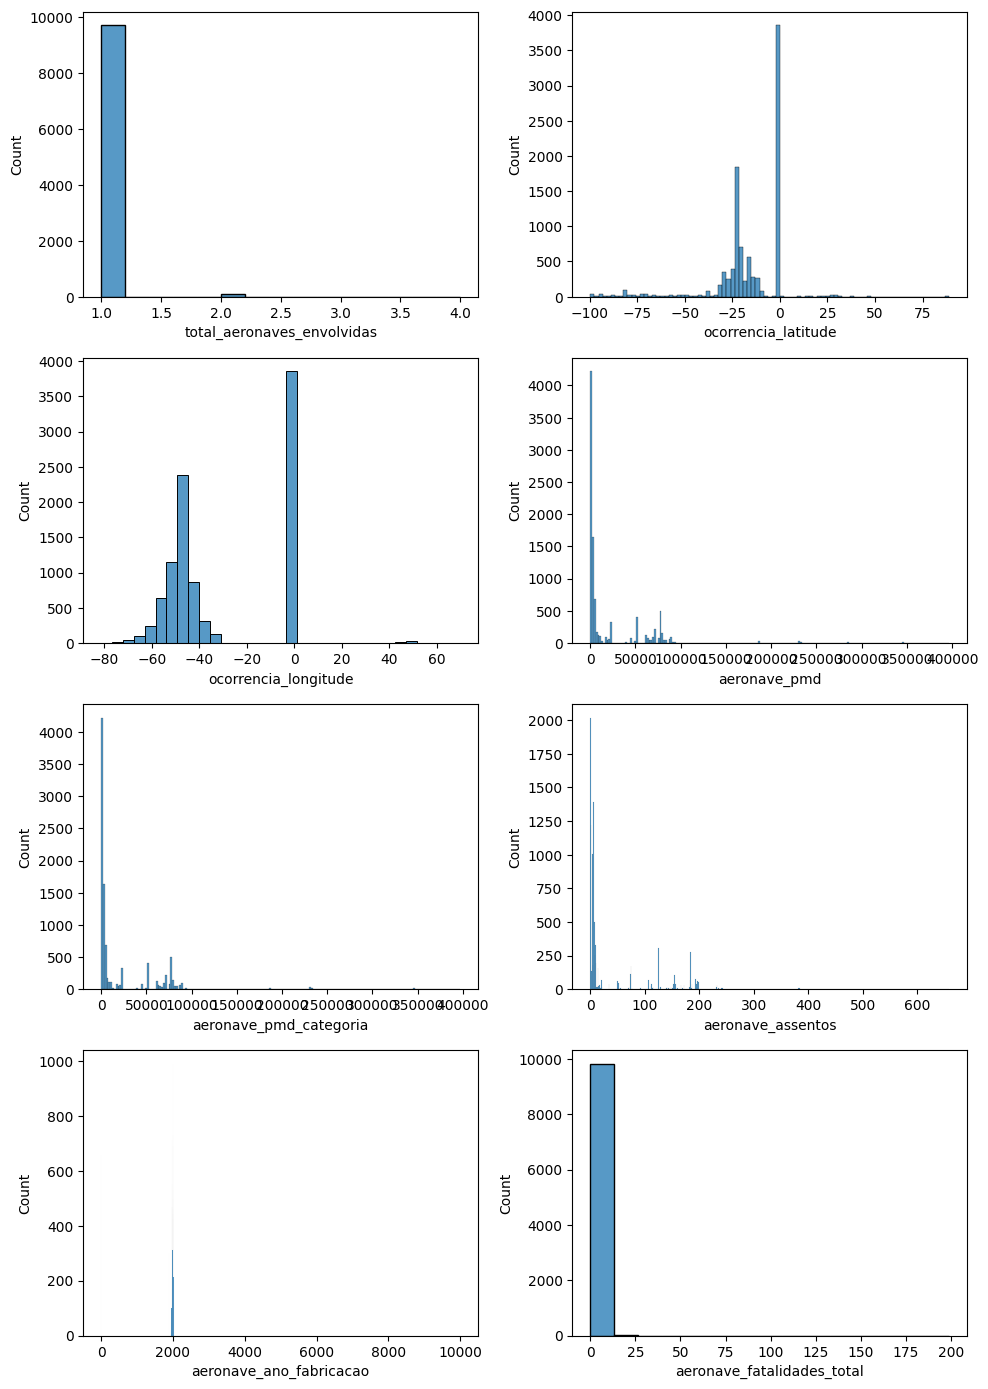

In [44]:
# plota histogramas de variáveis numéricas
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 14), tight_layout=True)

for ax, feature in zip(axs.flatten(), df_number):
    sns.histplot(x=feature, ax=ax, data=df_acidentes_aero)

plt.show()

In [45]:
df_acidentes_aero.head(1)

,ocorrencia_classificacao,ocorrencia_cidade,ocorrencia_uf,ocorrencia_pais,ocorrencia_aerodromo,ocorrencia_dia,ocorrencia_hora,investigacao_status,total_aeronaves_envolvidas,ocorrencia_saida_pista,ocorrencia_latitude,ocorrencia_longitude,aeronave_matricula,aeronave_tipo_veiculo,aeronave_fabricante,aeronave_modelo,aeronave_tipo_icao,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_pmd,aeronave_pmd_categoria,aeronave_assentos,aeronave_ano_fabricacao,aeronave_pais_fabricante,aeronave_pais_registro,aeronave_registro_categoria,aeronave_registro_segmento,aeronave_voo_origem,aeronave_voo_destino,aeronave_fase_operacao,aeronave_tipo_operacao,aeronave_nivel_dano,aeronave_fatalidades_total,ocorrencia_tipo,ocorrencia_tipo_categoria,taxonomia_tipo_icao,fator_nome,fator_aspecto,fator_condicionante,fator_area,recomendacao_conteudo,recomendacao_status,recomendacao_destinatario_sigla,recomendacao_destinatario,periodo
0,INCIDENTE,LONDRINA,PR,BRASIL,SBLO,2007-01-01,2024-05-16 00:00:00,NaN,1,NÃO,0.0,0.0,PTVQL,AVIÃO,NEIVA INDUSTRIA AERONAUTICA,EMB-810D,PA34,PISTÃO,BIMOTOR,2155,2155,6.0,1993.0,BRASIL,BRASIL,AVIÃO,PARTICULAR,FORA DE AERODROMO,FORA DE AERODROMO,PARTIDA DO MOTOR,PRIVADA,***,0,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,FALHA OU MAU FUNCIONAMENTO DE SISTEMA / COMPON...,SCF-NP,***,***,***,***,***,***,***,***,00:00 às 06:00


In [46]:
colunas_onehot = [
        'ocorrencia_classificacao',
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'periodo',   
        ]

colunas_nro = [
        'ocorrencia_latitude',
        'ocorrencia_longitude',         
        ]

In [47]:
df_acidentes_aero = df_acidentes_aero[[
        'ocorrencia_classificacao',
        'ocorrencia_saida_pista',
        'aeronave_tipo_veiculo',
        'aeronave_motor_tipo',
        'aeronave_motor_quantidade',
        'aeronave_tipo_operacao',
        'aeronave_nivel_dano',
        'periodo',     

        'ocorrencia_latitude',
        'ocorrencia_longitude', 
        ]]

In [48]:
df_acidentes_aero = df_acidentes_aero.sort_index()

In [49]:
df_acidentes_aero.head(5)

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0
3,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,INSTRUÇÃO,***,00:00 às 06:00,0.0,0.0
4,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,TÁXI AÉREO,NENHUM,18:00 às 00:00,0.0,0.0


In [50]:
preprocessing = ColumnTransformer(
    [
        ("one-hot", OneHotEncoder(), colunas_onehot),
        #("standard", StandardScaler(), colunas_nro),
        ("minmax", MinMaxScaler(), colunas_nro),
        #("power", PowerTransformer(), colunas_nro),
    ]
)

preprocessing.fit_transform(df_acidentes_aero).toarray()

array([[0.        , 1.        , 0.        , ..., 0.        , 0.5281773 ,
        0.53790148],
       [0.        , 1.        , 0.        , ..., 1.        , 0.5281773 ,
        0.53790148],
       [0.        , 1.        , 0.        , ..., 1.        , 0.5281773 ,
        0.53790148],
       ...,
       [0.        , 1.        , 0.        , ..., 0.        , 0.40854222,
        0.27038411],
       [1.        , 0.        , 0.        , ..., 0.        , 0.4036187 ,
        0.23597232],
       [0.        , 1.        , 0.        , ..., 1.        , 0.42820542,
        0.21886566]])

In [51]:
df_acidentes_aero_trans = pd.DataFrame(
    preprocessing.fit_transform(df_acidentes_aero).toarray(),
    columns=preprocessing.get_feature_names_out(), 
)

In [52]:
df_acidentes_aero_trans = pd.concat([df_acidentes_aero, df_acidentes_aero_trans], axis=1)

In [53]:
df_acidentes_aero_trans.head(3)

,ocorrencia_classificacao,ocorrencia_saida_pista,aeronave_tipo_veiculo,aeronave_motor_tipo,aeronave_motor_quantidade,aeronave_tipo_operacao,aeronave_nivel_dano,periodo,ocorrencia_latitude,ocorrencia_longitude,one-hot__ocorrencia_classificacao_ACIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE,one-hot__ocorrencia_classificacao_INCIDENTE GRAVE,one-hot__ocorrencia_saida_pista_NÃO,one-hot__ocorrencia_saida_pista_SIM,one-hot__aeronave_tipo_veiculo_***,one-hot__aeronave_tipo_veiculo_ANFÍBIO,one-hot__aeronave_tipo_veiculo_AVIÃO,one-hot__aeronave_tipo_veiculo_BALÃO,one-hot__aeronave_tipo_veiculo_DIRIGÍVEL,one-hot__aeronave_tipo_veiculo_GIROCÓPTERO,one-hot__aeronave_tipo_veiculo_HELICÓPTERO,one-hot__aeronave_tipo_veiculo_HIDROAVIÃO,one-hot__aeronave_tipo_veiculo_PLANADOR,one-hot__aeronave_tipo_veiculo_TRIKE,one-hot__aeronave_tipo_veiculo_ULTRALEVE,one-hot__aeronave_motor_tipo_***,one-hot__aeronave_motor_tipo_JATO,one-hot__aeronave_motor_tipo_PISTÃO,one-hot__aeronave_motor_tipo_SEM TRAÇÃO,one-hot__aeronave_motor_tipo_TURBOEIXO,one-hot__aeronave_motor_tipo_TURBOÉLICE,one-hot__aeronave_motor_quantidade_***,one-hot__aeronave_motor_quantidade_BIMOTOR,one-hot__aeronave_motor_quantidade_MONOMOTOR,one-hot__aeronave_motor_quantidade_QUADRIMOTOR,one-hot__aeronave_motor_quantidade_SEM TRAÇÃO,one-hot__aeronave_motor_quantidade_TRIMOTOR,one-hot__aeronave_tipo_operacao_***,one-hot__aeronave_tipo_operacao_AGRÍCOLA,one-hot__aeronave_tipo_operacao_ESPECIALIZADA,one-hot__aeronave_tipo_operacao_EXPERIMENTAL,one-hot__aeronave_tipo_operacao_INSTRUÇÃO,one-hot__aeronave_tipo_operacao_NÃO REGULAR,one-hot__aeronave_tipo_operacao_POLICIAL,one-hot__aeronave_tipo_operacao_PRIVADA,one-hot__aeronave_tipo_operacao_REGULAR,one-hot__aeronave_tipo_operacao_TÁXI AÉREO,one-hot__aeronave_nivel_dano_***,one-hot__aeronave_nivel_dano_DESTRUÍDA,one-hot__aeronave_nivel_dano_LEVE,one-hot__aeronave_nivel_dano_NENHUM,one-hot__aeronave_nivel_dano_SUBSTANCIAL,one-hot__periodo_00:00 às 06:00,one-hot__periodo_06:00 às 12:00,one-hot__periodo_12:00 às 18:00,one-hot__periodo_18:00 às 00:00,minmax__ocorrencia_latitude,minmax__ocorrencia_longitude
0,INCIDENTE,NÃO,AVIÃO,PISTÃO,BIMOTOR,PRIVADA,***,00:00 às 06:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.528177,0.537901
1,INCIDENTE,NÃO,AVIÃO,PISTÃO,MONOMOTOR,PRIVADA,NENHUM,18:00 às 00:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901
2,INCIDENTE,NÃO,AVIÃO,JATO,BIMOTOR,***,***,18:00 às 00:00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.528177,0.537901


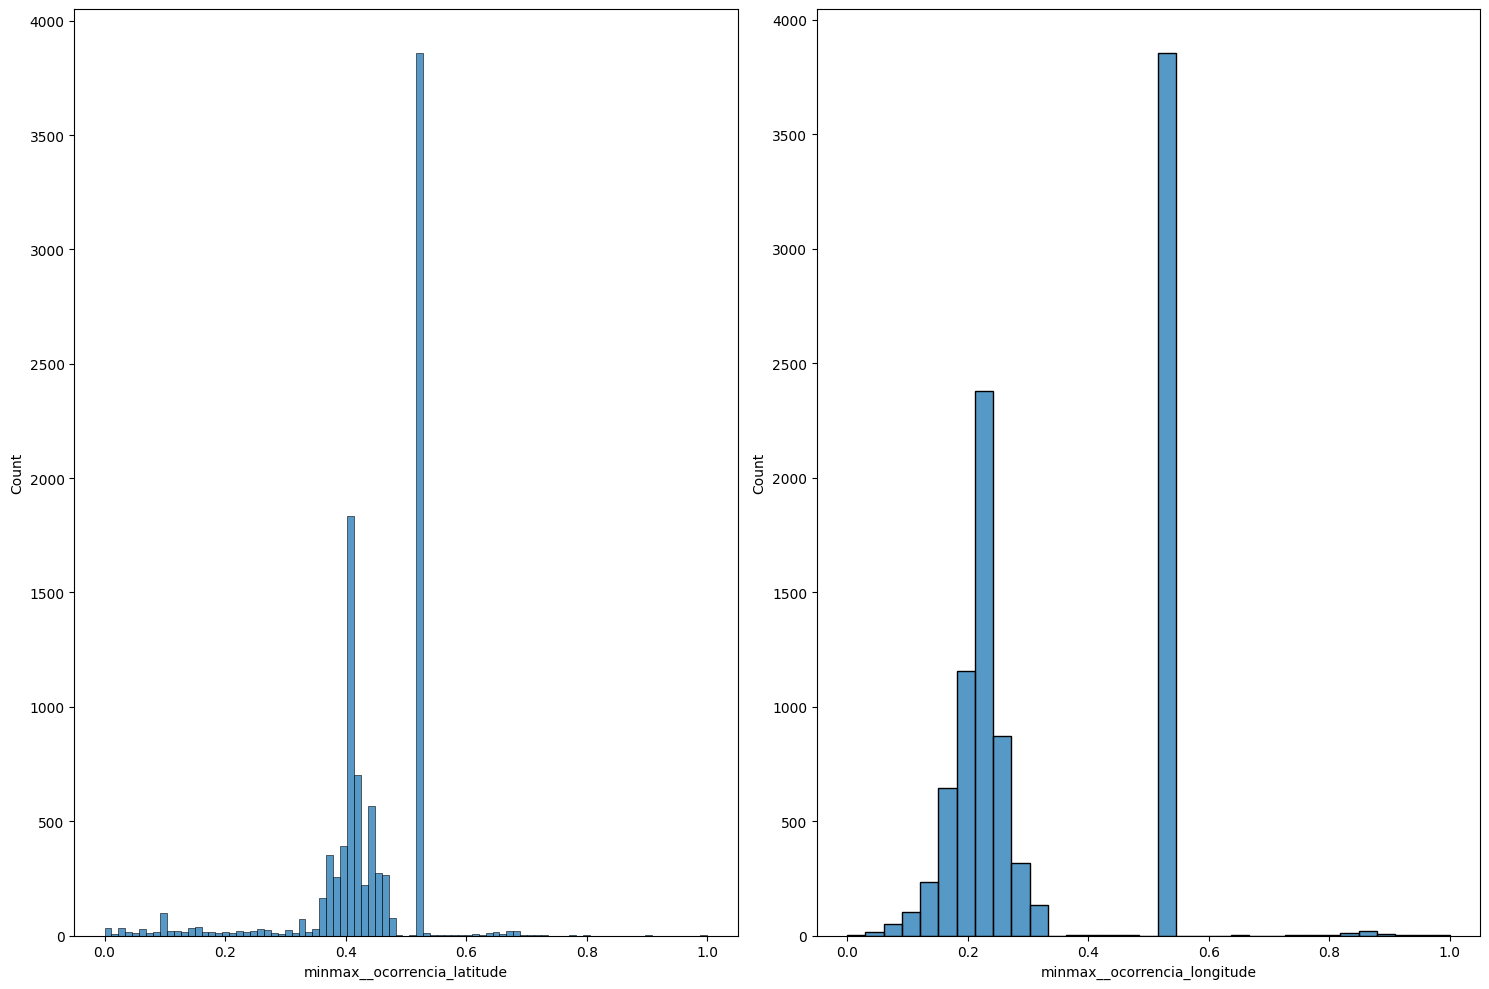

In [54]:
# plota histogramas de variáveis numéricas
colunas = ["minmax__ocorrencia_latitude", 
           "minmax__ocorrencia_longitude",          
           ]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), tight_layout=True)

for ax, feature in zip(axs.flatten(), colunas):
    sns.histplot(x=feature, ax=ax, data=df_acidentes_aero_trans)

plt.show()

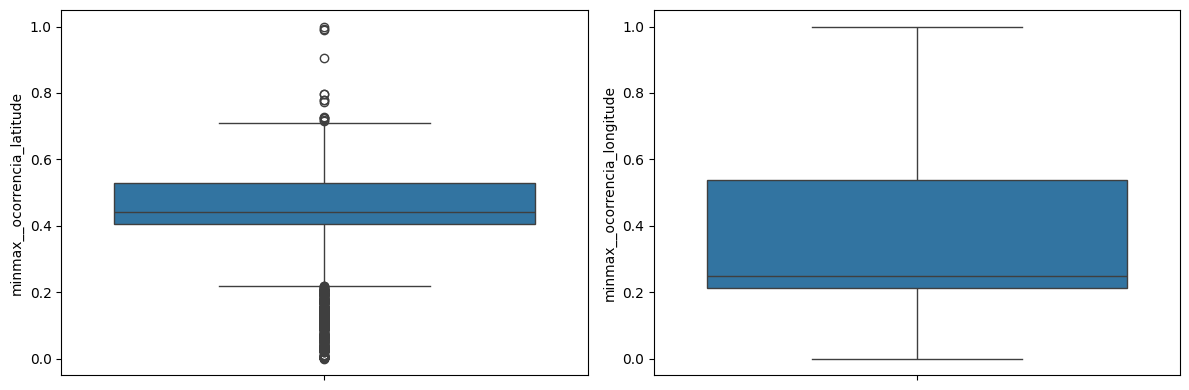

In [55]:
search_outliers = ["minmax__ocorrencia_latitude", 
                   "minmax__ocorrencia_longitude",
                    ]
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [56]:
def retira_outliers(dfx, x):
    q75,q25 = np.percentile(dfx.loc[:,x],[75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    dfx.loc[dfx[x] < min,x] = np.nan
    dfx.loc[dfx[x] > max,x] = np.nan

    dfx = dfx.dropna(axis = 0)
            
    return dfx

In [57]:
# chama função para retirar outliers
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__ocorrencia_latitude')
df_acidentes_aero_trans = retira_outliers(df_acidentes_aero_trans, 'minmax__ocorrencia_latitude')

In [58]:
df_acidentes_aero_trans.shape

(9357, 59)

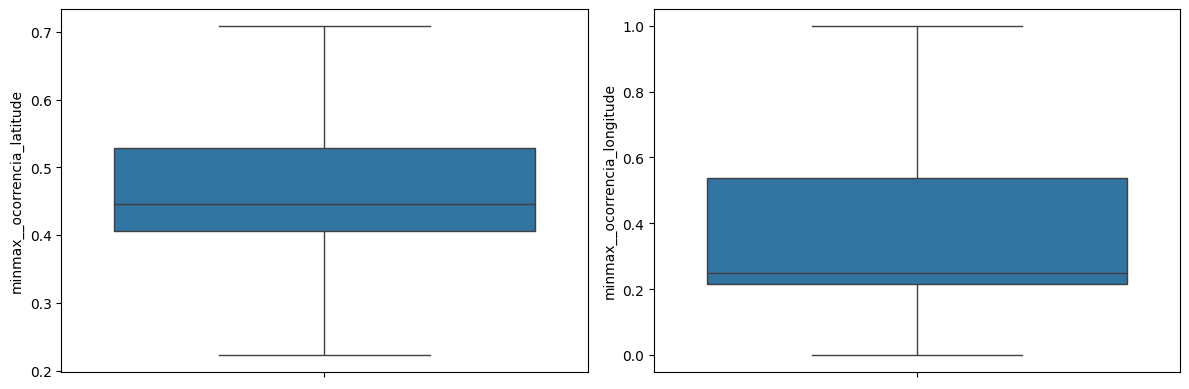

In [59]:
search_outliers = ["minmax__ocorrencia_latitude", "minmax__ocorrencia_longitude"]

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4), tight_layout=True)

for i, column in enumerate(search_outliers):
    sns.boxplot(y=column, data=df_acidentes_aero_trans, ax=axs[i])

plt.show()

In [60]:
print('skew latitude', skew(df_acidentes_aero_trans['minmax__ocorrencia_latitude'], axis=0, bias=True))
print('kurtosis latitude',kurtosis(df_acidentes_aero_trans['minmax__ocorrencia_latitude'], axis=0, bias=True))
print('')
print('skew longitude', skew(df_acidentes_aero_trans['minmax__ocorrencia_longitude'], axis=0, bias=True))
print('kurtosis longitude',kurtosis(df_acidentes_aero_trans['minmax__ocorrencia_longitude'], axis=0, bias=True))

skew latitude -0.16851893611167537
kurtosis latitude -0.14727111704816176

skew longitude 0.3495784340706966
kurtosis longitude -1.4491364551606796


In [61]:
# salva os dados tratados em arquivo csv organizado pelo índice
df_acidentes_aero_trans.sort_index().to_csv('arquivos_tratados/df_acidentes_aero_trans.csv', index=False)